In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import keras
import matplotlib.pyplot as plt 
import cv2 
import sklearn.metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#loading data

fire_false_X = np.load('class_fire_False_data0to5000.npy') #(256,256,8,5000)
fire_true_X = np.load('class_fire_True_data0to5000.npy') #(256,256,8,5001)
random_data= np.load('class_fire_False_random_data0to1000.npy') #(256,256,8,1000)

In [3]:
#transform arrays to load into model

fire_false_X = np.concatenate((fire_false_X,random_data),axis=3)
X = np.concatenate((fire_false_X,fire_true_X),axis=3) #all fire examples in large array
X = np.transpose(X, [3,0,1,2])

Y_false = np.zeros(6000)
Y_true = np.ones(5001)
Y = np.concatenate((Y_false, Y_true))

In [4]:
#splitting into train, val, test sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5)

# Baseline CNN Model

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [8]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001))
classifier.add(Conv2D(64, 5, 5, input_shape = (256, 256, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001))
classifier.add(Conv2D(32, 3, 3, activation = 'elu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer
classifier.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001))
classifier.add(Conv2D(64, 3, 3, activation = 'elu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001))
classifier.add(Conv2D(128, 3, 3, activation = 'elu'))
# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/home/ubuntu/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), input_shape=(256, 256,..., activation="relu")`
/home/ubuntu/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="elu")`
/home/ubuntu/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
/home/ubuntu/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="elu")`
/home/ubuntu/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:26: UserWarning: Update your `Dense` call to the Keras

In [9]:
classifier.fit(X_train[:,:,:,0:3], Y_train,
                         nb_epoch = 5,
                         validation_data = (X_val[:,:,:,0:3], Y_val), 
                        batch_size=64
                        )

/home/ubuntu/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 8800 samples, validate on 1101 samples
Epoch 1/5
8800/8800 [==============================] - 1430s 162ms/step - loss: 3.1593 - accuracy: 0.6184 - val_loss: 1.7254 - val_accuracy: 0.4668
Epoch 2/5
8800/8800 [==============================] - 1430s 163ms/step - loss: 0.5984 - accuracy: 0.6662 - val_loss: 0.8018 - val_accuracy: 0.5940
Epoch 3/5
8800/8800 [==============================] - 1435s 163ms/step - loss: 0.5743 - accuracy: 0.6689 - val_loss: 0.6135 - val_accuracy: 0.6558
Epoch 4/5
8800/8800 [==============================] - 1432s 163ms/step - loss: 0.5541 - accuracy: 0.6931 - val_loss: 0.6117 - val_accuracy: 0.6585
Epoch 5/5
8800/8800 [==============================] - 1432s 163ms/step - loss: 0.5446 - accuracy: 0.7133 - val_loss: 0.5558 - val_accuracy: 0.7003


In [11]:
classifier.evaluate(X_val[:,:,:,0:3], Y_val)

1101/1101 [==============================] - 43s 39ms/step


[0.5557943313474768, 0.7002725005149841]

In [12]:
classifier.evaluate(X_test[:,:,:,0:3], Y_test)

1100/1100 [==============================] - 44s 40ms/step


[0.5494986766034906, 0.7063636183738708]

In [13]:
y_pred = classifier.predict(X_test[:,:,:,0:3])

In [26]:
y_pred_bool = np.where(y_pred > 0.5, 1, 0)

In [27]:
print(classification_report(Y_test, y_pred_bool))

              precision    recall  f1-score   support

         0.0       0.81      0.60      0.69       596
         1.0       0.64      0.83      0.72       504

   micro avg       0.71      0.71      0.71      1100
   macro avg       0.72      0.72      0.71      1100
weighted avg       0.73      0.71      0.70      1100



# CNN model with added channels

In [ ]:
# Initialising the CNN
classifier2 = Sequential()

# Step 1 - Convolution
classifier2.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001))
classifier2.add(Conv2D(64, 5, 5, input_shape = (256, 256, 8), activation = 'relu'))
# Step 2 - Pooling
classifier2.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier2.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001))
classifier2.add(Conv2D(32, 3, 3, activation = 'elu'))
classifier2.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer
classifier2.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001))
classifier2.add(Conv2D(64, 3, 3, activation = 'elu'))
classifier2.add(MaxPooling2D(pool_size = (2, 2)))

classifier2.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001))
classifier2.add(Conv2D(128, 3, 3, activation = 'elu'))
# Step 3 - Flattening
classifier2.add(Flatten())

# Step 4 - Full connection
classifier2.add(Dense(output_dim = 128, activation = 'relu'))
classifier2.add(Dense(output_dim = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier2.fit(X_train, Y_train,
                         nb_epoch = 10,
                         validation_data = (X_val, Y_val), 
                        batch_size=64
                        )

In [ ]:
classifier2.evaluate(X_val, Y_val)

In [ ]:
classifier2.evaluate(X_test, Y_test)

In [ ]:
y_pred = classifier2.predict(X_test)
print(classification_report(Y_test, y_pred))

# CNN model with dropout

In [23]:
# Initialising the CNN
classifier3 = Sequential()

# Step 1 - Convolution
classifier3.add(Dropout(.2))
classifier3.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001))
classifier3.add(Conv2D(64, 5, 5, input_shape = (256, 256, 8), activation = 'relu'))
# Step 2 - Pooling
classifier3.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier3.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001))
classifier3.add(Conv2D(32, 3, 3, activation = 'elu'))
classifier3.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer
classifier3.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001))
classifier3.add(Conv2D(64, 3, 3, activation = 'elu'))
classifier3.add(MaxPooling2D(pool_size = (2, 2)))

classifier3.add(keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001))
classifier3.add(Conv2D(128, 3, 3, activation = 'elu'))
classifier3.add(Dropout(.2))
# Step 3 - Flattening
classifier3.add(Flatten())

# Step 4 - Full connection
classifier3.add(Dense(output_dim = 128, activation = 'relu'))
classifier3.add(Dense(output_dim = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/home/ubuntu/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), input_shape=(256, 256,..., activation="relu")`
/home/ubuntu/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="elu")`
/home/ubuntu/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
/home/ubuntu/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="elu")`
/home/ubuntu/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:28: UserWarning: Update your `Dense` call to the Keras

In [24]:
history3 = classifier3.fit(X_train, Y_train,
                         nb_epoch = 10,
                         validation_data = (X_val, Y_val), 
                        batch_size=64
                        )

/home/ubuntu/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 8800 samples, validate on 1101 samples
Epoch 1/10
8800/8800 [==============================] - 1919s 218ms/step - loss: 1.3410 - accuracy: 0.8356 - val_loss: 0.4043 - val_accuracy: 0.8638
Epoch 2/10
8800/8800 [==============================] - 1917s 218ms/step - loss: 0.2071 - accuracy: 0.9193 - val_loss: 0.3599 - val_accuracy: 0.8147
Epoch 3/10
8800/8800 [==============================] - 1918s 218ms/step - loss: 0.1768 - accuracy: 0.9385 - val_loss: 0.5067 - val_accuracy: 0.9410
Epoch 4/10
8800/8800 [==============================] - 1934s 220ms/step - loss: 0.1474 - accuracy: 0.9498 - val_loss: 0.3591 - val_accuracy: 0.9173
Epoch 5/10
8800/8800 [==============================] - 1932s 220ms/step - loss: 0.1372 - accuracy: 0.9550 - val_loss: 0.4564 - val_accuracy: 0.9146
Epoch 6/10
8800/8800 [==============================] - 1932s 220ms/step - loss: 0.1301 - accuracy: 0.9564 - val_loss: 0.3991 - val_accuracy: 0.9282
Epoch 7/10
8800/8800 [==============================] - 19

In [25]:
classifier3.evaluate(X_val, Y_val)

1101/1101 [==============================] - 53s 48ms/step


[0.19031102179323783, 0.9536784887313843]

In [26]:
classifier3.evaluate(X_test, Y_test)

1100/1100 [==============================] - 52s 48ms/step


[0.23303586097603493, 0.9572727084159851]

In [27]:
y_pred = classifier3.predict(X_test)
y_pred_bool = np.where(y_pred > 0.5, 1, 0)
print(classification_report(Y_test, y_pred_bool))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       601
         1.0       0.94      0.96      0.95       499

   micro avg       0.96      0.96      0.96      1100
   macro avg       0.96      0.96      0.96      1100
weighted avg       0.96      0.96      0.96      1100



Text(0.5, 1.0, 'CNN Model 3 ROC Curve')

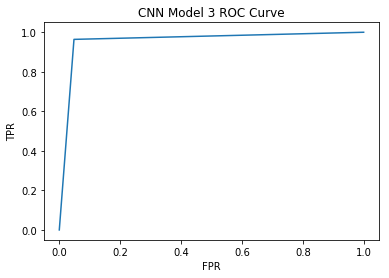

In [29]:
sklearn.metrics.roc_auc_score(Y_test, y_pred_bool)
fpr, tpr, thresholds = sklearn.metrics.roc_curve(Y_test, y_pred_bool)
plt.plot(fpr, tpr)
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.title('CNN Model 3 ROC Curve')

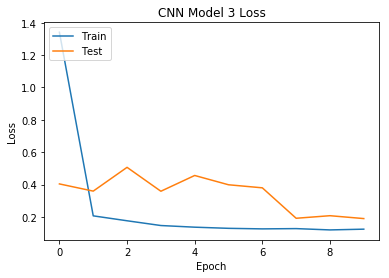

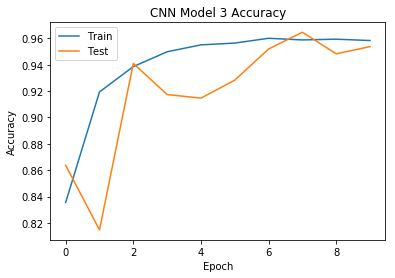

In [32]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('CNN Model 3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('CNN Model 3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# ResNet50 Model

In [6]:
from keras.applications.resnet import ResNet50
import keras

In [7]:
model_resnet50 = ResNet50(include_top=False, pooling='avg', weights='imagenet',input_shape=(256,256,3))  
x = model_resnet50.output  
for layer in model_resnet50.layers:
    layer.trainable=False
predictions = Dense(1, activation='sigmoid')(x)
model_resnet50 = keras.Model(input = model_resnet50.input, output = predictions)


model_resnet50.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


94773248/94765736 [==============================] - 5s 0us/step
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/home/ubuntu/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [8]:
sliced_X_train = X_train[:,:,:,0:3]
sliced_X_val = X_val[:,:,:,0:3]

hist = model_resnet50.fit(sliced_X_train, Y_train,
                         nb_epoch = 10,
                         validation_data = (sliced_X_val, Y_val), 
                        batch_size=64
                        )

/home/ubuntu/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 8800 samples, validate on 1101 samples
Epoch 1/10
8800/8800 [==============================] - 1925s 219ms/step - loss: 0.5487 - accuracy: 0.7205 - val_loss: 0.9636 - val_accuracy: 0.4632
Epoch 2/10
8800/8800 [==============================] - 1910s 217ms/step - loss: 0.4768 - accuracy: 0.7793 - val_loss: 0.9068 - val_accuracy: 0.4896
Epoch 3/10
8800/8800 [==============================] - 1909s 217ms/step - loss: 0.4563 - accuracy: 0.7881 - val_loss: 0.8895 - val_accuracy: 0.5232
Epoch 4/10
8800/8800 [==============================] - 1910s 217ms/step - loss: 0.4434 - accuracy: 0.7967 - val_loss: 0.8051 - val_accuracy: 0.5386
Epoch 5/10
8800/8800 [==============================] - 1913s 217ms/step - loss: 0.4291 - accuracy: 0.8086 - val_loss: 0.7969 - val_accuracy: 0.5513
Epoch 6/10
8800/8800 [==============================] - 1908s 217ms/step - loss: 0.4224 - accuracy: 0.8158 - val_loss: 0.7289 - val_accuracy: 0.5858
Epoch 7/10
8800/8800 [==============================] - 1

In [9]:
model_resnet50.evaluate(X_val[:,:,:,0:3], Y_val)

1101/1101 [==============================] - 239s 217ms/step


[0.6718592273983276, 0.6348773837089539]

In [11]:
model_resnet50.evaluate(X_test[:,:,:,0:3], Y_test)

1100/1100 [==============================] - 238s 217ms/step


[0.6610739690607245, 0.6409090757369995]

In [14]:
y_pred = model_resnet50.predict(X_test[:,:,:,0:3])

y_pred_bool = np.where(y_pred > 0.5, 1, 0)
print(classification_report(Y_test, y_pred_bool))

              precision    recall  f1-score   support

         0.0       0.79      0.47      0.59       601
         1.0       0.57      0.85      0.68       499

   micro avg       0.64      0.64      0.64      1100
   macro avg       0.68      0.66      0.63      1100
weighted avg       0.69      0.64      0.63      1100



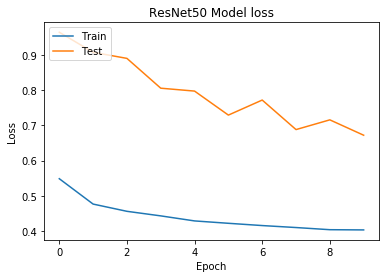

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('ResNet50 Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Text(0.5, 1.0, 'ResNet50 Model ROC Curve')

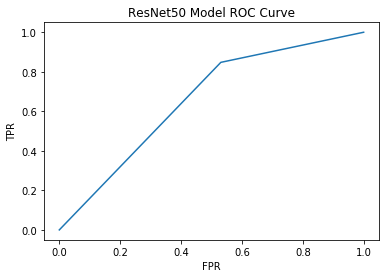

In [21]:
sklearn.metrics.roc_auc_score(Y_test, y_pred_bool)
fpr, tpr, thresholds = sklearn.metrics.roc_curve(Y_test, y_pred_bool)
plt.plot(fpr, tpr)
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.title('ResNet50 Model ROC Curve')